## Machine Learning & AI

![Colegio Bourbaki](./Images/Bourbaki.png)

### Cadenas y procesos de decision de Markov

### Q-Learning

Q-Learning es un algoritmo de aprendizaje por refuerzo utilizado para encontrar la política óptima de selección de acciones para un proceso de decisión de Markov finito dado. En un mundo cuadriculado, un agente navega por una cuadrícula para alcanzar un objetivo, evitar obstáculos o maximizar algún tipo de recompensa.

Q-Learning fue introducido por Chris Watkins en 1989. Watkins y Peter Dayan presentaron una prueba de convergencia en 1992.

### Ambiente

![Board](./Images/board.png)

Los componentes clave de un algoritmo de este tipo podrían incluir:

* Configuración del entorno: Definición del mundo cuadriculado, incluyendo su tamaño, posiciones inicial y final, obstáculos y posibles estados y acciones para el agente.

* Inicialización de la tabla Q: Una tabla que almacena los valores Q para cada par estado-acción. Esta tabla se actualiza a medida que el agente aprende del entorno.

* Parámetros de aprendizaje: Incluyen la tasa de aprendizaje (alfa), el factor de descuento (gamma) y detalles de la política, como la tasa de exploración (épsilon) para la política epsilon-greedy.

* Bucle de aprendizaje: El bucle principal en el que el agente interactúa con el entorno, actualizando los valores Q en función de las recompensas recibidas y el siguiente estado al que se mueve. Este bucle suele mecanismos para que el agente explore el entorno (tomando acciones aleatorias) y explote su conocimiento actual (tomando la acción más conocida).

* Extracción de políticas: Tras el entrenamiento, extracción de la política óptima de la tabla Q, que dicta la mejor acción a tomar a partir de cada estado.

* Visualización o prueba: Código para probar la política aprendida y posiblemente visualizar al agente navegando por el mundo cuadriculado, mostrando cómo ha aprendido a alcanzar el objetivo o maximizar su recompensa.

### Q-Learning y Ecuaciones de Bellman

![RL](./Images/rl.jpg)

**Componentes principales del Q-learning:**

* **Agente:** Entidad que aprende a tomar decisiones basadas en el estado del entorno.
* **Entorno:** El mundo con el que interactúa el agente, que incluye estados y recompensas.
* **Estados:** Representaciones del entorno en un momento dado.
* **Acciones:** Las diferentes operaciones que el agente puede realizar en el entorno.
* **Recompensas:** Valor que el agente recibe después de tomar una acción en un estado específico, indicando el éxito o fracaso de esa acción.

Funcionamiento del Q-learning:

1) **Inicialización:** Se crea una tabla Q inicializada con ceros (o valores aleatorios pequeños), donde las filas representan los estados y las columnas las acciones. Los valores Q representan la calidad de una acción específica tomada en un estado específico.

2) **Interacción con el entorno:** En cada episodio de entrenamiento, el agente toma acciones en el entorno, observa las recompensas recibidas y actualiza los valores Q en la tabla Q basándose en esas recompensas y las estimaciones futuras de recompensas.

3) **Política de acción:** El agente utiliza una política (como ε-greedy) para explorar el entorno tomando acciones aleatorias con una probabilidad ε o explotar el conocimiento actual eligiendo la acción con el mayor valor Q para el estado actual con una probabilidad de 1-ε. Esto equilibra la exploración de nuevas acciones con la explotación de acciones conocidas que maximizan las recompensas.

4) **Actualización de la tabla Q:** Después de cada acción, la tabla Q se actualiza utilizando la ecuación de actualización de Q-learning:

$Q(s,a)=Q(s,a)+α[r+γ max_{a^′}​Q(s^′,a^′)−Q(s,a)]$

Donde:

* $Q(s,a)$: El valor Q actual para el estado $s$ y la acción $a$.
* $α$: Tasa de aprendizaje.
* $r$: Recompensa recibida por tomar la acción $a$ en el estado $s$.
* $γ$: Factor de descuento para las recompensas futuras.
* $max⁡_{a′}Q(s^′,a^′)$: La mejor estimación de valor Q para el próximo estado $s^′$.

![Q-equation](./Images/Qequation.png)

**Convergencia:**

Con suficiente interacción y actualización, la tabla Q converge hacia los valores óptimos, permitiendo que el agente tome las mejores decisiones para maximizar las recompensas totales a lo largo del tiempo.

El Q-learning es un algoritmo poderoso y flexible para el aprendizaje por refuerzo que no requiere un modelo del entorno, lo que lo hace adecuado para una amplia gama de aplicaciones, desde juegos hasta problemas de decisión en entornos complejos y dinámicos.

### Librerías

In [1]:
import numpy as np

### Parámetros

In [2]:
BOARD_ROWS = 3
BOARD_COLS = 4
WIN_STATE = (2, 3)
LOSE_STATE = (1, 3)
START = (0, 0)
DETERMINISTIC = False

### Definición

El siguiente código define una clase State para un entorno de mundo cuadriculado en un contexto de aprendizaje por refuerzo, específicamente adaptado para un agente que navega por un tablero 2D. La clase contiene métodos para inicializar el estado, manejar las recompensas, comprobar las condiciones de terminación, determinar las siguientes acciones (con un giro probabilístico para el movimiento), calcular la siguiente posición basada en una acción, y visualizar el tablero. Desglosemos cada parte de la clase:

**__init__(self, state=START):**
* Inicializa un nuevo estado del tablero con todas las posiciones a cero, excepto una posición específica marcada con -1 (posiblemente un obstáculo o una posición de penalización).
* El parámetro state se inicializa con START, indicando la posición inicial del agente.
* self.isEnd indica si el estado actual es terminal (es decir, un estado de victoria o derrota).
* Las dimensiones del tablero (BOARD_ROWS, BOARD_COLS) y el valor DETERMINISTIC deben definirse por fuera.
* La bandera self.determine decide si las acciones dan lugar a resultados deterministas o probabilísticos.

**giveReward(self):**

* Devuelve una recompensa basada en el estado actual: 1 para un estado ganador, -1 para un estado perdedor, y 0 para todos los demás estados.

**isEndFunc(self):**

* Comprueba si el estado actual es un estado terminal (victoria o derrota) y actualiza self.isEnd en consecuencia.

**_chooseActionProb(self, action):**

* Implementa un enfoque probabilístico para decidir la acción real tomada, dada una acción prevista. Esto modela la incertidumbre en el movimiento donde, por ejemplo, intentar moverse "hacia arriba" puede resultar en moverse "hacia la izquierda" o "hacia la derecha" con una pequeña probabilidad.

**nxtPosition(self, acción):**

* Calcula el siguiente estado basándose en la acción actual. Si self.determine es True, calcula directamente el siguiente estado en función de la acción. Si es False, utiliza _chooseActionProb para determinar probabilísticamente la siguiente acción, haciendo que el entorno no sea determinista.
* Comprueba si el siguiente estado está dentro de los límites del tablero y no es un obstáculo; en caso contrario, permanece en el estado actual.

**showBoard(self):**

* Visualiza el estado actual del tablero con la posición del agente marcada con *, los obstáculos o penalizaciones con z, y las posiciones vacías con 0.


In [3]:
class Environment:
    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        self.board[1, 1] = -1
        self.state = state
        self.isEnd = False
        self.determine = DETERMINISTIC
        
    def giveReward(self):
        if self.state == WIN_STATE:
            return 1
        elif self.state == LOSE_STATE:
            return -1
        else:
            return 0
    
    def isEndFunc(self):
        if (self.state == WIN_STATE) or (self.state == LOSE_STATE):
            self.isEnd = True

    def _chooseActionProb(self, action):
        if action == "up":
            return np.random.choice(["up", "left", "right"], p=[0.8, 0.1, 0.1])
        if action == "down":
            return np.random.choice(["down", "left", "right"], p=[0.8, 0.1, 0.1])
        if action == "left":
            return np.random.choice(["left", "up", "down"], p=[0.8, 0.1, 0.1])
        if action == "right":
            return np.random.choice(["right", "up", "down"], p=[0.8, 0.1, 0.1])
        
    def nxtPosition(self, action):
        """
        action: up, down, left, right
        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position on board
        """
        if self.determine:
            if action == "up":
                nxtState = (self.state[0]-1, self.state[1])
            elif action == "down":
                nxtState = (self.state[0]+1, self.state[1])
            elif action == "left":
                nxtState = (self.state[0], self.state[1]-1)
            else:
                nxtState = (self.state[0], self.state[1]+1)
            self.determine = False
        else:
            # non-deterministic
            action = self._chooseActionProb(action)
            self.determine = True
            nxtState = self.nxtPosition(action)
                        
        # if next state is legal
        if (nxtState[0] >= 0) and (nxtState[0] <= 2):
            if (nxtState[1] >= 0) and (nxtState[1] <= 3):
                if nxtState != (1, 1):
                    return nxtState
        return self.state
    
    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, BOARD_ROWS):
            print('-----------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -1:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                out += token + ' | '
            print(out)
        print('-----------------')    

Esta clase encapsula la lógica necesaria para que un agente interactúe con un mundo cuadriculado en una configuración sencilla de aprendizaje por refuerzo. La elección probabilística de acciones introduce un elemento de incertidumbre que hace que el entorno sea más complejo y realista. La implementación de reglas de movimiento, la estructura de recompensas y la comprobación del estado terminal son componentes esenciales para simular y resolver problemas de aprendizaje por refuerzo.

### Agente

El siguiente código define una clase Agente diseñada para interactuar con la clase State en un entorno de mundo cuadriculado, como se ha comentado anteriormente. El agente aprende a navegar por el entorno utilizando Q-learning, un algoritmo de aprendizaje por refuerzo sin modelos. La clase está estructurada para permitir que el agente explore el entorno, aprenda de sus experiencias y actualice sus conocimientos sobre las acciones más gratificantes a realizar en diferentes estados. Desglosemos los componentes clave de la clase Agente:

**__init__(self):**

* Inicializa el agente con una lista vacía de estados para registrar las posiciones y acciones realizadas.
* Define las posibles acciones que puede realizar el agente: arriba, abajo, izquierda y derecha.
* Inicializa el estado actual del agente creando una instancia de la clase State.
* Establece los parámetros de aprendizaje: tasa de aprendizaje (lr), tasa de exploración (exp_rate) y factor de descuento (decay_gamma).
* Inicializa a cero los valores Q de cada par estado-acción. Los valores Q se almacenan en un diccionario de diccionarios, donde las claves externas del diccionario son tuplas de estado y las claves internas del diccionario son acciones.

**chooseAction(self):**

* Decide la siguiente acción a tomar basándose en la política actual. Con una probabilidad igual a la tasa de exploración (exp_rate), el agente elige aleatoriamente una acción para explorar el entorno. En caso contrario, elige la acción con la mayor recompensa esperada (acción codiciosa) basándose en sus valores Q actuales.

**takeAction(self, action):**

* Actualiza la posición del agente en función de la acción realizada. Utiliza el método nxtPosition de la clase State para calcular el siguiente estado y devuelve una nueva instancia de State que representa este siguiente estado.

**reset(self):**

* Restablece el agente a su estado inicial borrando la lista de estados registrados y reinicializando la instancia State. Este método se utiliza al final de cada episodio para iniciar una nueva partida.

**play(self, rounds=10):**
* El bucle principal donde el agente juega el juego durante un número especificado de rondas. En cada ronda, el agente elige repetidamente acciones, actualiza su estado y registra los pares estado-acción hasta que el juego termina (es decir, alcanza un estado terminal).
* Cuando el juego termina, el agente actualiza los valores Q de todos los pares estado-acción encontrados en el episodio en orden inverso (retropropagación). La recompensa recibida al final del juego se utiliza para actualizar los valores Q, ajustados por la tasa de aprendizaje (lr) y el factor de descuento (decay_gamma). Este proceso se conoce como aprendizaje por diferencia temporal (TD).
* Tras actualizar los valores Q, el agente restablece su estado para iniciar un nuevo episodio.

In [ ]:
class Agent:
    
    def __init__(self):
        self.states = []  # record position and action taken at the position
        self.actions = ["up", "down", "left", "right"]
        self.State = Environment()
        self.isEnd = self.State.isEnd
        self.lr = 0.2
        self.exp_rate = 0.3
        self.decay_gamma = 0.9

        # initial Q values
        self.Q_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.Q_values[(i, j)] = {}
                for a in self.actions:
                    self.Q_values[(i, j)][a] = 0  # Q value is a dict of dict  

    def chooseAction(self):
        # ε-greedy
        if np.random.rand() < self.exp_rate:
            return np.random.choice(self.actions)

        current_position = self.State.state
        # start lower than any real Q
        mx_nxt_reward = -float('inf')
        best_action = None

        for a in self.actions:
            val = self.Q_values[current_position][a]
            if val > mx_nxt_reward:
                mx_nxt_reward = val
                best_action = a

        # guaranteed to be one of ["up","down","left","right"]
        return best_action
    
    def takeAction(self, action):
        position = self.State.nxtPosition(action)
        # update State
        return Environment(state=position)     
    
    def reset(self):
        self.states = []
        self.State = Environment()
        self.isEnd = self.State.isEnd
    
    def play(self, rounds=10):
        i = 0
        while i < rounds:
            # to the end of game back propagate reward
            if self.State.isEnd:
                # back propagate
                reward = self.State.giveReward()
                for a in self.actions:
                    self.Q_values[self.State.state][a] = reward
                print("Game End Reward", reward)
                for s in reversed(self.states):
                    current_q_value = self.Q_values[s[0]][s[1]]
                    reward = current_q_value + self.lr*(self.decay_gamma*reward - current_q_value)
                    self.Q_values[s[0]][s[1]] = round(reward, 3)
                self.reset()
                i += 1
            else:
                action = self.chooseAction()
                # append trace
                self.states.append([(self.State.state), action])
                print("current position {} action {}".format(self.State.state, action))
                # by taking the action, it reaches the next state
                self.State = self.takeAction(action)
                # mark is end
                self.State.isEndFunc()
                print("nxt state", self.State.state)
                print("---------------------")
                self.isEnd = self.State.isEnd

**Conceptos clave:**

* Exploración vs. Explotación: El agente utiliza una política de epsilon-greedy para la selección de acciones, equilibrando entre la exploración de nuevas acciones con una elección aleatoria y la explotación de acciones conocidas con los valores Q más altos.
* Actualización del aprendizaje Q: Los valores Q se actualizan mediante la fórmula 

$Q(s,a)=Q(s,a)+α[r+γmaxa′Q(s′,a′)-Q(s,a)]$, 

donde αα es la tasa de aprendizaje, rr es la recompensa, γγ es el factor de descuento, s′ es el siguiente estado, y a′ son las posibles acciones en el siguiente estado. Esta fórmula se simplifica en el código para actualizar los valores Q en función de la recompensa recibida al final del juego, lo que demuestra una forma básica de la regla de actualización del aprendizaje Q.

Esta clase encapsula el comportamiento de aprendizaje de un agente en un entorno de mundo cuadriculado, utilizando el aprendizaje Q para mejorar su política de navegación a través de la cuadrícula para alcanzar su objetivo.

In [5]:
ag = Agent()

In [6]:
ag.Q_values

{(0, 0): {'up': 0, 'down': 0, 'left': 0, 'right': 0},
 (0, 1): {'up': 0, 'down': 0, 'left': 0, 'right': 0},
 (0, 2): {'up': 0, 'down': 0, 'left': 0, 'right': 0},
 (0, 3): {'up': 0, 'down': 0, 'left': 0, 'right': 0},
 (1, 0): {'up': 0, 'down': 0, 'left': 0, 'right': 0},
 (1, 1): {'up': 0, 'down': 0, 'left': 0, 'right': 0},
 (1, 2): {'up': 0, 'down': 0, 'left': 0, 'right': 0},
 (1, 3): {'up': 0, 'down': 0, 'left': 0, 'right': 0},
 (2, 0): {'up': 0, 'down': 0, 'left': 0, 'right': 0},
 (2, 1): {'up': 0, 'down': 0, 'left': 0, 'right': 0},
 (2, 2): {'up': 0, 'down': 0, 'left': 0, 'right': 0},
 (2, 3): {'up': 0, 'down': 0, 'left': 0, 'right': 0}}

In [7]:
ag.play(1000)

current position (0, 0) action up
nxt state (0, 0)
---------------------
current position (0, 0) action up
nxt state (0, 0)
---------------------
current position (0, 0) action up
nxt state (0, 0)
---------------------
current position (0, 0) action up
nxt state (0, 0)
---------------------
current position (0, 0) action up
nxt state (0, 0)
---------------------
current position (0, 0) action up
nxt state (0, 0)
---------------------
current position (0, 0) action up
nxt state (0, 0)
---------------------
current position (0, 0) action down
nxt state (1, 0)
---------------------
current position (1, 0) action up
nxt state (1, 0)
---------------------
current position (1, 0) action up
nxt state (0, 0)
---------------------
current position (0, 0) action up
nxt state (0, 0)
---------------------
current position (0, 0) action up
nxt state (0, 0)
---------------------
current position (0, 0) action right
nxt state (0, 0)
---------------------
current position (0, 0) action up
nxt state (0

In [8]:
ag.Q_values

{(0, 0): {'up': 0.256, 'down': 0.35, 'left': 0.258, 'right': 0.278},
 (0, 1): {'up': 0.17, 'down': 0.174, 'left': 0.311, 'right': 0.134},
 (0, 2): {'up': 0.155, 'down': 0.351, 'left': 0.171, 'right': 0.112},
 (0, 3): {'up': -0.012, 'down': -0.146, 'left': 0.14, 'right': -0.005},
 (1, 0): {'up': 0.303, 'down': 0.459, 'left': 0.301, 'right': 0.378},
 (1, 1): {'up': 0, 'down': 0, 'left': 0, 'right': 0},
 (1, 2): {'up': 0.14, 'down': 0.644, 'left': 0.257, 'right': -0.838},
 (1, 3): {'up': -1, 'down': -1, 'left': -1, 'right': -1},
 (2, 0): {'up': 0.374, 'down': 0.414, 'left': 0.457, 'right': 0.565},
 (2, 1): {'up': 0.569, 'down': 0.508, 'left': 0.417, 'right': 0.652},
 (2, 2): {'up': 0.484, 'down': 0.701, 'left': 0.474, 'right': 0.856},
 (2, 3): {'up': 1, 'down': 1, 'left': 1, 'right': 1}}

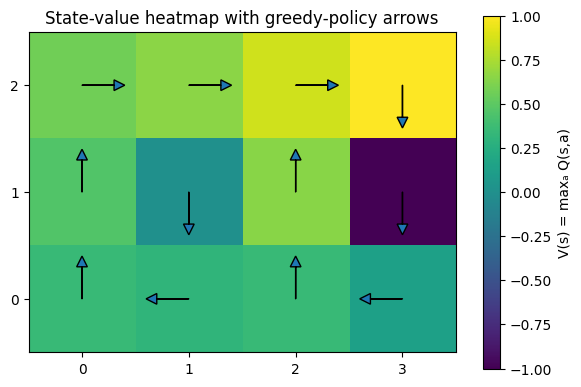

In [9]:
import matplotlib.pyplot as plt

rows = max(r for r,c in ag.Q_values) + 1
cols = max(c for r,c in ag.Q_values) + 1

# build V(s) and best‐action map
V = np.zeros((rows, cols))
best = {}
for (r,c), actions in ag.Q_values.items():
    # best action name
    a_star = max(actions, key=actions.get)
    best[(r,c)] = a_star
    V[r,c] = actions[a_star]

# map actions to arrow vectors (dx, dy)
action_vec = {
    'up':    ( 0,  1),
    'down':  ( 0, -1),
    'left':  (-1,  0),
    'right': ( 1,  0),
}

plt.figure(figsize=(6,4))

# 1) plot heatmap of V
plt.imshow(V, origin='upper', interpolation='nearest')
plt.colorbar(label='V(s) = maxₐ Q(s,a)')

# 2) overlay arrows for the greedy policy
for (r,c), a in best.items():
    dx, dy = action_vec[a]
    # note: in image coords x=c, y=r; invert dy because image y grows downward
    plt.arrow(c, r, dx*0.3, -dy*0.3,
              head_width=0.1, head_length=0.1)

plt.xticks(range(cols)); plt.yticks(range(rows))
plt.gca().invert_yaxis()
plt.title('State‐value heatmap with greedy‐policy arrows')
plt.tight_layout()
plt.show()

### Ejercicio

Otra forma de hacerlo probabilista sin que las acciones sean aleatorias es de la siguiente manera: que los estados estén determinados por 4 sensores que tiene el agente, cada uno le dice si hay una pared a su alrededor o no. Así no siempre sabe dónde está y podría estar en un estado, hacer una acción y no siempre ir al mismo sitio. **Intentar resolver el problema por este método.**

### Preguntas

1) ¿Qué es Q-learning y en qué tipo de problemas se aplica?
2) Identifica y describe los componentes principales de un algoritmo Q-learning.
3) ¿Cómo se actualizan los valores Q en el algoritmo Q-learning? Proporciona la fórmula y explica cada uno de sus componentes.
4) Describe la política epsilon-greedy y explica cómo equilibra la exploración y la explotación.
5) ¿Por qué es importante la función de recompensa en Q-learning? Describe cómo influye en el aprendizaje del agente.
6) Dado un conjunto de valores Q para un estado específico y diferentes acciones, ¿cómo decidiría un agente la próxima acción a realizar?
7) ¿Bajo qué condiciones se espera que Q-learning converja a la política óptima?
8) ¿Cómo afecta el valor del factor de descuento (γ) en el comportamiento de aprendizaje de un agente Q-learning?
9) ¿Qué efecto tiene la tasa de aprendizaje (α) en el proceso de actualización de Q-learning y cómo debería ser seleccionada?
10) ¿Cómo se puede adaptar Q-learning para manejar entornos con espacios de estados y/o acciones continuos?
11) Explica por qué Q-learning es considerado un algoritmo off-policy y qué implica esto en términos de aprendizaje.
12) Discute cómo la inicialización de los valores Q puede afectar el aprendizaje y la exploración del agente.
13) Proporciona ejemplos de cómo se ha aplicado Q-learning en problemas del mundo real. ¿Cuáles son algunos de los desafíos encontrados?

### Adaptado de: 

* https://github.com/MJeremy2017/reinforcement-learning-implementation/tree/master/GridWorld

### Referencias

* A Beginners Guide to Q-Learning: https://towardsdatascience.com/a-beginners-guide-to-q-learning-c3e2a30a653c

* Knowledge transfer in Reinforcement Learning ...can RL be a little easier?: https://regressionist.github.io/2019-05-13-Reinforcement-Learning/

#### Artículos de interés

* DeepMind AI Reduces Google Data Centre Cooling Bill by 40%: https://deepmind.google/discover/blog/deepmind-ai-reduces-google-data-centre-cooling-bill-by-40/

![Lenguaje Matemático](./Images/Matematicas.png)

![Contacto](./Images/Contacto.png)